# Grip Task 7 - Stock Market Prediction using Numerical and Textual Analysis

Author: Sajal Misra

In [2]:
#loading libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from textblob import TextBlob

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

os.chdir("/Users/prashant/downloads")   #changing directory

In [ ]:
#loading datasets
tdf = pd.read_csv("india-news-headlines.csv")
ndf = pd.read_csv("RELIANCE.csv")

In [94]:
tdf.rename(columns = {'publish_date':'Date'}, inplace = True)    #renaming publish_date to Date
tdf.drop("headline_category",axis=1,inplace=True)                #droping headline_category column
tdf.head(-5)

,Date,headline_text
0,20010101,win over cena satisfying but defeating underta...
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
...,...,...
3297162,20200630,vehicle of up stf team bringing gangster vikas...
3297163,20200630,sushant singh rajputs demise fans trend cbifor...
3297164,20200630,amitabh bachchans grandson agastya nanda prepp...
3297165,20200630,icse isc result 2020 when where to check class...


In [95]:
tdf["Date"] = pd.to_datetime(tdf["Date"],format='%Y%m%d')
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 2 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Date           datetime64[ns]
 1   headline_text  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 50.3+ MB


In [96]:
tdf.head()

,Date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa


In [97]:
tdf.isnull().sum()

Date             0
headline_text    0
dtype: int64

In [98]:
ndf.head(-5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,2020-05-15,RELIANCE,EQ,1435.95,1444.00,1466.70,1415.10,1453.20,1459.40,1439.85,28683432,4.129983e+15,592403.0,7448167.0,0.2597
5066,2020-05-18,RELIANCE,EQ,1459.40,1470.00,1482.00,1428.00,1442.55,1440.75,1452.86,28981620,4.210627e+15,575336.0,5396937.0,0.1862
5067,2020-05-19,RELIANCE,EQ,1440.75,1457.00,1461.70,1403.25,1409.10,1408.90,1436.68,19529216,2.805721e+15,424987.0,4452799.0,0.2280
5068,2020-05-20,RELIANCE,EQ,1408.90,1410.00,1446.85,1393.00,1437.40,1433.70,1426.52,25530692,3.641994e+15,446373.0,6638736.0,0.2600


In [99]:
ndf = ndf[["Date","Open","High","Low","Close","Volume"]]
ndf.head(-5)

,Date,Open,High,Low,Close,Volume
0,2000-01-03,237.50,251.70,237.50,251.70,4456424
1,2000-01-04,258.40,271.85,251.30,271.85,9487878
2,2000-01-05,256.65,287.90,256.65,282.50,26833684
3,2000-01-06,289.00,300.70,289.00,294.35,15682286
4,2000-01-07,295.00,317.90,293.00,314.55,19870977
...,...,...,...,...,...,...
5065,2020-05-15,1444.00,1466.70,1415.10,1459.40,28683432
5066,2020-05-18,1470.00,1482.00,1428.00,1440.75,28981620
5067,2020-05-19,1457.00,1461.70,1403.25,1408.90,19529216
5068,2020-05-20,1410.00,1446.85,1393.00,1433.70,25530692


In [100]:
ndf["Date"]= pd.to_datetime(ndf["Date"])
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5075 entries, 0 to 5074
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5075 non-null   datetime64[ns]
 1   Open    5075 non-null   float64       
 2   High    5075 non-null   float64       
 3   Low     5075 non-null   float64       
 4   Close   5075 non-null   float64       
 5   Volume  5075 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 238.0 KB


In [101]:
ndf.describe()

,Open,High,Low,Close,Volume
count,5075.000000,5075.000000,5075.000000,5075.000000,5.075000e+03
mean,967.397271,981.117429,952.283685,966.214729,5.130275e+06
std,542.662284,552.104362,530.774975,541.236031,4.155610e+06
min,205.500000,219.500000,197.150000,203.200000,5.282000e+04
25%,554.000000,561.875000,545.000000,551.225000,2.778337e+06
50%,920.100000,931.000000,909.300000,920.000000,4.085150e+06
75%,1142.775000,1160.925000,1118.200000,1139.325000,6.215759e+06
max,3298.000000,3298.000000,3141.300000,3220.850000,6.523089e+07


In [102]:
ndf.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Text(0, 0.5, 'Close')

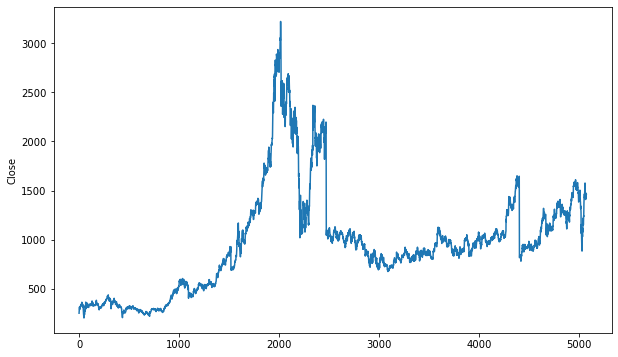

In [103]:
#figure plot
plt.figure(figsize=(10, 6))
ndf['Close'].plot()
plt.ylabel('Close')

# Removing unwanted characters from headline_text

In [104]:
#removing unwanted characters from the headlines_text
tdf.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
tdf["headline_text"].head(5)

0    win over cena satisfying but defeating underta...
1    Status quo will not be disturbed at Ayodhya  s...
2                  Fissures in Hurriyat over Pak visit
3                America's unwanted heading for India 
4                   For bigwigs  it is destination Goa
Name: headline_text, dtype: object

# Changing both dataset so as the range of Date is same in both historical and textual data 

In [105]:
#droping rows of Textual dataset having Date greater than date in Numerical dataset 
index_names = tdf[tdf['Date'] > ndf["Date"].iloc[-1] ].index
tdf.drop(index_names, inplace=True)
tdf.head(-5)

,Date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India
4,2001-01-02,For bigwigs it is destination Goa
...,...,...
3281062,2020-05-29,Covid Patients are dying before they get tested
3281063,2020-05-29,Covid Manchar village adopts Kerala's model
3281064,2020-05-29,Big ticket investments in pipeline for Andhra ...
3281065,2020-05-29,fresh cases detected in Jharkhand private ...


In [106]:
#droping rows of Numerical dataset so it has range of date same as in Textual dataset
index_names = ndf[ndf["Date"]< str(tdf["Date"].iloc[0])[:10]].index
ndf.drop(index_names,inplace=True)
ndf.head(-5)

,Date,Open,High,Low,Close,Volume
250,2001-01-01,340.00,343.65,339.00,341.75,3008237
251,2001-01-02,340.35,359.00,340.25,354.30,6623970
252,2001-01-03,355.00,361.70,353.00,360.05,8844088
253,2001-01-04,359.10,366.90,356.20,357.80,5982701
254,2001-01-05,356.50,366.80,356.50,364.30,7460148
...,...,...,...,...,...,...
5065,2020-05-15,1444.00,1466.70,1415.10,1459.40,28683432
5066,2020-05-18,1470.00,1482.00,1428.00,1440.75,28981620
5067,2020-05-19,1457.00,1461.70,1403.25,1408.90,19529216
5068,2020-05-20,1410.00,1446.85,1393.00,1433.70,25530692


In [107]:
ndf.reset_index(inplace = True, drop = True)  #reseting index
ndf.head(-5)

,Date,Open,High,Low,Close,Volume
0,2001-01-01,340.00,343.65,339.00,341.75,3008237
1,2001-01-02,340.35,359.00,340.25,354.30,6623970
2,2001-01-03,355.00,361.70,353.00,360.05,8844088
3,2001-01-04,359.10,366.90,356.20,357.80,5982701
4,2001-01-05,356.50,366.80,356.50,364.30,7460148
...,...,...,...,...,...,...
4815,2020-05-15,1444.00,1466.70,1415.10,1459.40,28683432
4816,2020-05-18,1470.00,1482.00,1428.00,1440.75,28981620
4817,2020-05-19,1457.00,1461.70,1403.25,1408.90,19529216
4818,2020-05-20,1410.00,1446.85,1393.00,1433.70,25530692


In [108]:
tdf = tdf[tdf["Date"].isin(ndf["Date"])] #rows of data having common Date in Textual and Numerical Dataset
tdf

,Date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India
4,2001-01-02,For bigwigs it is destination Goa
...,...,...
3281067,2020-05-29,Sarangi bats for menstrual hygiene awareness a...
3281068,2020-05-29,Covid count breaches mark in Rajasthan
3281069,2020-05-29,Kaushambi man tests Covid ve dist tally
3281070,2020-05-29,Bengaluru Padarayanapura corporator tests pos...


# Megring all rows of headline_text falling under same date and deleting duplicates

In [109]:
#Grouping the headlines for each day
tdf['headline_text'] = tdf.groupby(['Date']).transform(lambda x : ' '.join(x)) 
tdf = tdf.drop_duplicates(subset=None, keep='first', inplace=False) 
tdf.reset_index(inplace = True, drop = True)
tdf

,Date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya s...
2,2001-01-03,Powerless north India gropes in the dark Think...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
...,...,...
4792,2020-05-22,More int'l cargo lifted but 'charges prohibiti...
4793,2020-05-26,Tips for a cooler pregnancy this summer Over ...
4794,2020-05-27,nmc to continue day quarantine of ve person...
4795,2020-05-28,Santosh Sivan I always wanted to work with Ma...


# Function to calculate Polarity and Subjectivity

In [110]:
def polarity(headline):
    return TextBlob(headline).sentiment.polarity

def subjectivity(headline):
    return TextBlob(headline).sentiment.subjectivity

# Adding Polarity, Subjectivity, Compound, Positivity, Negativity & Neutral pol.

In [111]:
tdf["Subjectivity"] = tdf["headline_text"].apply(subjectivity)
tdf["Polarity"] = tdf["headline_text"].apply(polarity)
tdf

<ipython-input-111-92ffdb1e7ffb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf["Subjectivity"] = tdf["headline_text"].apply(subjectivity)
<ipython-input-111-92ffdb1e7ffb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf["Polarity"] = tdf["headline_text"].apply(polarity)


,Date,headline_text,Subjectivity,Polarity
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333
1,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590
2,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286
3,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039
4,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024
...,...,...,...,...
4792,2020-05-22,More int'l cargo lifted but 'charges prohibiti...,0.403210,0.094056
4793,2020-05-26,Tips for a cooler pregnancy this summer Over ...,0.384973,0.074355
4794,2020-05-27,nmc to continue day quarantine of ve person...,0.410017,0.100727
4795,2020-05-28,Santosh Sivan I always wanted to work with Ma...,0.401495,0.069517


In [117]:
sia = SIA()

tdf['Compound'] = [sia.polarity_scores(text)['compound'] for text in tdf['headline_text']]
tdf['Negatitexte'] = [sia.polarity_scores(text)['neg'] for text in tdf['headline_text']]
tdf['Neutral'] = [sia.polarity_scores(text)['neu'] for text in tdf['headline_text']]
tdf['Posititexte'] = [sia.polarity_scores(text)['pos'] for text in tdf['headline_text']]
tdf

<ipython-input-117-6bffd7c967a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['Compound'] = [sia.polarity_scores(text)['compound'] for text in tdf['headline_text']]
<ipython-input-117-6bffd7c967a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['Negatitexte'] = [sia.polarity_scores(text)['neg'] for text in tdf['headline_text']]
<ipython-input-117-6bffd7c967a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,Date,headline_text,Subjectivity,Polarity,Compound,Negatitexte,Neutral,Posititexte
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333,-0.0000,0.230,0.473,0.297
1,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590,-0.9792,0.121,0.809,0.071
2,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286,-0.8910,0.156,0.735,0.109
3,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039,0.7543,0.104,0.792,0.104
4,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024,0.9645,0.142,0.694,0.164
...,...,...,...,...,...,...,...,...
4792,2020-05-22,More int'l cargo lifted but 'charges prohibiti...,0.403210,0.094056,-0.9999,0.164,0.740,0.096
4793,2020-05-26,Tips for a cooler pregnancy this summer Over ...,0.384973,0.074355,-0.9999,0.143,0.775,0.083
4794,2020-05-27,nmc to continue day quarantine of ve person...,0.410017,0.100727,-0.9997,0.136,0.767,0.097
4795,2020-05-28,Santosh Sivan I always wanted to work with Ma...,0.401495,0.069517,-0.9999,0.146,0.773,0.081


# Merging historical and textual data

In [118]:
df_merge = pd.merge(tdf, ndf, how='left', on='Date')
df_merge

,Date,headline_text,Subjectivity,Polarity,Compound,Negatitexte,Neutral,Posititexte,Open,High,Low,Close,Volume
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333,-0.0000,0.230,0.473,0.297,340.00,343.65,339.00,341.75,3008237
1,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590,-0.9792,0.121,0.809,0.071,340.35,359.00,340.25,354.30,6623970
2,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286,-0.8910,0.156,0.735,0.109,355.00,361.70,353.00,360.05,8844088
3,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039,0.7543,0.104,0.792,0.104,359.10,366.90,356.20,357.80,5982701
4,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024,0.9645,0.142,0.694,0.164,356.50,366.80,356.50,364.30,7460148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,2020-05-22,More int'l cargo lifted but 'charges prohibiti...,0.403210,0.094056,-0.9999,0.164,0.740,0.096,1451.80,1458.00,1426.50,1431.55,17458503
4793,2020-05-26,Tips for a cooler pregnancy this summer Over ...,0.384973,0.074355,-0.9999,0.143,0.775,0.083,1448.15,1449.70,1416.30,1424.05,15330793
4794,2020-05-27,nmc to continue day quarantine of ve person...,0.410017,0.100727,-0.9997,0.136,0.767,0.097,1431.00,1454.00,1412.00,1445.55,16460764
4795,2020-05-28,Santosh Sivan I always wanted to work with Ma...,0.401495,0.069517,-0.9999,0.146,0.773,0.081,1455.00,1479.75,1449.00,1472.25,18519252


# Creating Dataset for model training

In [128]:
new_df = df_merge[['Close','Subjectivity','Polarity','Compound','Negatitexte','Neutral','Posititexte']]
new_df

,Close,Subjectivity,Polarity,Compound,Negatitexte,Neutral,Posititexte
0,341.75,0.633333,0.433333,-0.0000,0.230,0.473,0.297
1,354.30,0.286859,0.143590,-0.9792,0.121,0.809,0.071
2,360.05,0.392857,0.089286,-0.8910,0.156,0.735,0.109
3,357.80,0.445360,0.093039,0.7543,0.104,0.792,0.104
4,364.30,0.480553,0.264024,0.9645,0.142,0.694,0.164
...,...,...,...,...,...,...,...
4792,1431.55,0.403210,0.094056,-0.9999,0.164,0.740,0.096
4793,1424.05,0.384973,0.074355,-0.9999,0.143,0.775,0.083
4794,1445.55,0.410017,0.100727,-0.9997,0.136,0.767,0.097
4795,1472.25,0.401495,0.069517,-0.9999,0.146,0.773,0.081


# Normalizing Data

In [131]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df = pd.DataFrame(sc.fit_transform(new_df))
df.columns = new_df.columns
df.index = new_df.index
df.head()

,Close,Subjectivity,Polarity,Compound,Negatitexte,Neutral,Posititexte
0,0.044837,0.633333,0.909091,0.500025,0.518018,0.473,0.488487
1,0.049001,0.286859,0.513986,0.010401,0.272523,0.809,0.116776
2,0.050908,0.392857,0.439935,0.054503,0.351351,0.735,0.179276
3,0.050162,0.445360,0.445054,0.877194,0.234234,0.792,0.171053
4,0.052318,0.480553,0.678214,0.982299,0.319820,0.694,0.269737


In [132]:
X = df.drop('Close',axis=1)
X

,Subjectivity,Polarity,Compound,Negatitexte,Neutral,Posititexte
0,0.633333,0.909091,0.500025,0.518018,0.473,0.488487
1,0.286859,0.513986,0.010401,0.272523,0.809,0.116776
2,0.392857,0.439935,0.054503,0.351351,0.735,0.179276
3,0.445360,0.445054,0.877194,0.234234,0.792,0.171053
4,0.480553,0.678214,0.982299,0.319820,0.694,0.269737
...,...,...,...,...,...,...
4792,0.403210,0.446440,0.000050,0.369369,0.740,0.157895
4793,0.384973,0.419575,0.000050,0.322072,0.775,0.136513
4794,0.410017,0.455536,0.000150,0.306306,0.767,0.159539
4795,0.401495,0.412977,0.000050,0.328829,0.773,0.133224


In [133]:
Y = df['Close']
Y

0       0.044837
1       0.049001
2       0.050908
3       0.050162
4       0.052318
          ...   
4792    0.406386
4793    0.403898
4794    0.411031
4795    0.419889
4796    0.417285
Name: Close, Length: 4797, dtype: float64

# Splitting Dataset into train-test data

In [134]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
x_train.shape

(3837, 6)

# RandomForestRegressor Model

In [135]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)
prediction[:5]

array([0.32449614, 0.26905764, 0.22923215, 0.22031169, 0.33056465])

In [137]:
print(y_test[:5])
print('Mean Squared error: ',mean_squared_error(prediction,y_test))

4202    0.237920
2985    0.235199
1371    0.263183
502     0.025711
3546    0.220337
Name: Close, dtype: float64
Mean Squared error:  0.02965045043380045


# DecisionTreeRegressor Model

In [138]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
predictions = dt.predict(x_test)
predictions[:5]

array([0.44452185, 0.18908518, 0.19635067, 0.22259268, 0.44901717])

In [139]:
print(y_test[:5])
print('Mean Squared error: ',mean_squared_error(predictions,y_test))

4202    0.237920
2985    0.235199
1371    0.263183
502     0.025711
3546    0.220337
Name: Close, dtype: float64
Mean Squared error:  0.06281567081253919


We can see that our RandomForestRegressor Model performs better than DecisionTreeRegressor Model.